# Preprocess Datasets and Extract Features
> Feature engineering notebook

Dataset columns (same convention as the lab1):

| Col1 | Col2 | Col3 | Col3 | $\dots$ |
|------|------|------|------|---------|
| $Y$  |$Y_0$ | $X_1$| $X_2$| $\dots$ |

- $Y$ : labels or target values, in our case $X(T+5)$
- $Y_0$ : present value $X(T+0)$
- $X_1$, $X_2$, $\dots$ : other features

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
# matplotlib.rcParams['font.size']= 22 # use for presentation

## Import Normalized Datasets

In [ ]:
# Training data
with open('train_norm.npy', 'rb') as f:
    train_norm = np.load(f)
# Testing data
with open('test_norm.npy', 'rb') as f:
    test_norm = np.load(f)

## Extract Features

- Revision video: [Session 3: The Prediction Pipeline](https://youtu.be/4W6-48wXXEc?t=1246)

number of samples in normalized datasets

In [ ]:
print(f"train_norm: {train_norm.shape[0]} samples\ntest_norm : {test_norm.shape[0]} samples")

train_norm: 23032 samples
test_norm : 9872 samples


### Naive Window as Features

In [ ]:
from src.datautils import windowed_data, windowed_diff_data
# or
# from datautils import windowed_data

In [ ]:
window_size = 6 # Y(T+0) and 5 previous points, T-1,...,T-4,T-5
lead_time = 5 # T+5
start_time = window_size-1 # index of last elem of window

- Traing dataset, with window width 6; columns:`[Y(T+5), Y(T+0), ...,Y(T-5)]` 

In [ ]:
X_train = windowed_data(train_norm, lead_time=lead_time, window_size=window_size)
print(f'Training dataset (1st column is target Y(T+{lead_time})):',X_train.shape,f"\nwindowsize:{window_size}")

Training dataset (1st column is target Y(T+5)): (23022, 7) 
windowsize:6


In [ ]:
# plt.figure(figsize=[25,10])
# plt.plot(X_train[:,0],alpha=.8)
# plt.plot(X_train[:,1],alpha=.8)

- Testing dataset

In [ ]:
X_test = windowed_data(test_norm, lead_time=lead_time, window_size=window_size)
print(f'Testing dataset (1st column is target Y(T+{lead_time})):',X_test.shape,f"\nwindowsize:{window_size}")

Testing dataset (1st column is target Y(T+5)): (9862, 7) 
windowsize:6


In [ ]:
# plt.figure(figsize=[25,10])
# plt.plot(X_test[:,0],alpha=.8,label='Y(T+5)')
# plt.plot(X_test[:,1],alpha=.8,label='Y(T+0)')
# plt.plot(X_test[:,-1],alpha=.8,label='Y(T-5)')
# plt.axis([4000,4200,-1.1,2.5])
# plt.legend()

---

write training datasets to :
- `train_preprocessed_naivewin6.npy` and
- `test_preprocessed_naivewin6.npy`

`naivewin{}` stands for naive windowed data with window width `{}`

In [ ]:
# Training data
with open(f'train_preprocessed_naivewin{window_size}.npy', 'wb') as f:
    np.save(f,X_train)
# Testing data
with open(f'test_preprocessed_naivewin{window_size}.npy', 'wb') as f:
    np.save(f,X_test)

### Differences as Features

- First column is `Y(T+5)`
- 2nd column is `Y(T+0)`, present value
- 3rd to 7th are differences: `[Y(T+0)-Y(T-1), Y(T-1)-Y(T-2), Y(T-2)-Y(T-3), Y(T-3)-Y(T-4), Y(T-4)-Y(T-5)]`

In [ ]:
from src.datautils import windowed_data, windowed_diff_data
# or from datautils import windowed_diff_data

In [ ]:
window_size = 6 # Y(T+0) and 5 previous points, T-1,...,T-4,T-5
lead_time = 5 # T+5
start_time = window_size-1 # index of last elem of window

- Traing dataset, with window width 6 

In [ ]:
X_train = windowed_diff_data(train_norm, lead_time=lead_time, window_size=window_size)
print(f'Training dataset (1st column is target Y(T+{lead_time})):',X_train.shape,f"\nwindowsize:{window_size}")

Training dataset (1st column is target Y(T+5)): (23022, 7) 
windowsize:6


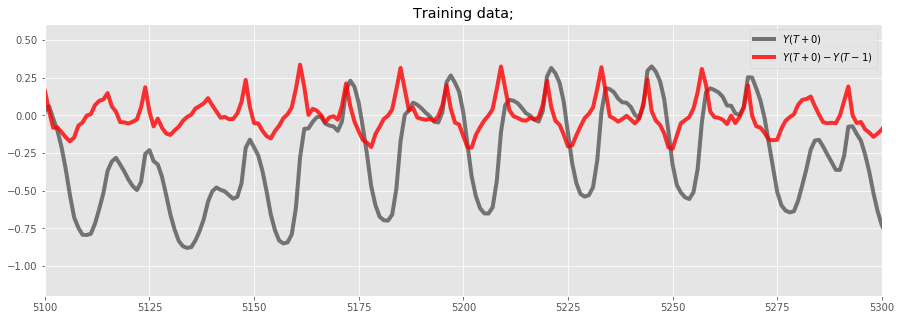

In [ ]:
# xaxis_range = [] # full range
xaxis_range = [5100,5300]

plt.figure(figsize=[15,5])
# plt.plot(X_test[:,2:],'o-',alpha=.3);
plt.plot(X_train[:,1],'k-',lw=4,alpha=.5,label='$Y(T+0)$');
plt.plot(X_train[:,2],'r-',lw=4,alpha=.8,label='$Y(T+0)-Y(T-1)$');
plt.legend()
plt.title(f'Training data;')
if len(xaxis_range)==2:
    axs_lims=plt.axis()
    plt.axis([xaxis_range[0],xaxis_range[1],axs_lims[2],axs_lims[3]*.3])
plt.show()

- Testing dataset

In [ ]:
X_test = windowed_diff_data(test_norm, lead_time=lead_time, window_size=window_size)
print(f'Testing dataset (1st column is target Y(T+{window_size})):',X_test.shape,f"\nwindowsize:{window_size}")

Testing dataset (1st column is target Y(T+6)): (9862, 7) 
windowsize:6


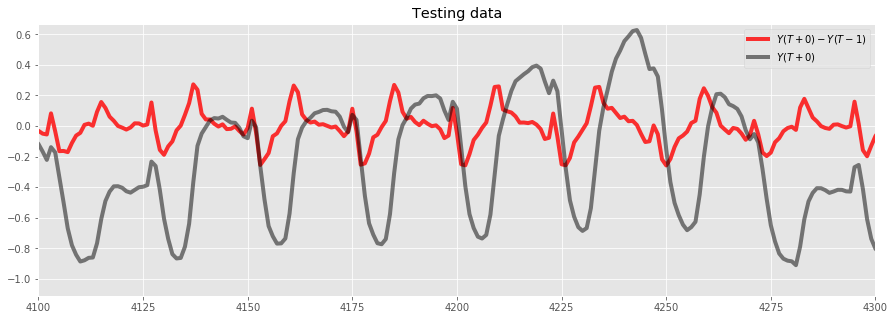

In [ ]:
# xaxis_range = [] # full range
xaxis_range = [4100,4300]
plt.figure(figsize=[15,5])
# plt.plot(X_test[:,2:],'o-',alpha=.3);
plt.plot(X_test[:,2],'r-',lw=4,alpha=.8,label='$Y(T+0)-Y(T-1)$');
plt.plot(X_test[:,1],'k-',lw=4,alpha=.5,label='$Y(T+0)$');
plt.legend()
plt.title('Testing data')
if len(xaxis_range)==2:
    axs_lims=plt.axis()
    plt.axis([xaxis_range[0],xaxis_range[1],axs_lims[2],axs_lims[3]*.3])
plt.show()

---

write training datasets to :
- `train_preprocessed_diff5.npy` and
- `test_preprocessed_diff5.npy`

`diff5` part stands for difference data for differences from `T-5` to `T+0` (5 $\Delta T$'s)

In [ ]:
# Training data
with open('train_preprocessed_diff5.npy', 'wb') as f:
    np.save(f,X_train)
# Testing data
with open('test_preprocessed_diff5.npy', 'wb') as f:
    np.save(f,X_test)